In [1]:
# imports
import pandas as pd
import numpy as np

# visualization imports
import matplotlib.pyplot as plt
import seaborn as sns

# modeling imports
from sklearn import linear_model, neighbors, ensemble 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score, confusion_matrix
from sklearn.metrics import precision_recall_curve, f1_score, roc_curve

In [2]:
# initialize db
from sqlalchemy import create_engine
from sqlalchemy import inspect

engine = create_engine("sqlite:///nbi_25_1.db")
insp = inspect(engine)
print(insp.get_table_names())

['nbi_25_1']


In [3]:
# get NBI dataset
data = pd.read_sql('SELECT * FROM nbi_25_1;',engine)
data_y = pd.read_sql('SELECT STRUC_DEF FROM nbi_25_1;', engine)
data_X = pd.read_sql('SELECT STATE_CODE_001, \
    LATITUDE, \
    LONGITUDE, \
    MAINTENANCE_021, \
    OWNER_022, \
    FUNCTIONAL_CLASS_026, \
    YEAR_BUILT_027, \
    TRAFFIC_LANES_ON_028A, \
    DESIGN_LOAD_031, \
    STRUCTURE_KIND_043A, \
    STRUCTURE_TYPE_043B, \
    MAIN_UNIT_SPANS_045, \
    MAX_SPAN_LEN_MT_048, \
    STRUCTURE_LEN_MT_049, \
    YEAR_RECONSTRUCTED_106, \
    DECK_STRUCTURE_TYPE_107, \
    SURFACE_TYPE_108A, \
    MEMBRANE_TYPE_108B, \
    DECK_PROTECTION_108C, \
    NATIONAL_NETWORK_110, \
    PIER_PROTECTION_111, \
    SCOUR_CRITICAL_113, \
    DECK_AREA \
    FROM nbi_25_1;', engine)

In [4]:
data_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45961 entries, 0 to 45960
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   STATE_CODE_001           45961 non-null  int64  
 1   Latitude                 45961 non-null  float64
 2   Longitude                45961 non-null  float64
 3   MAINTENANCE_021          45961 non-null  int64  
 4   OWNER_022                45961 non-null  int64  
 5   FUNCTIONAL_CLASS_026     45961 non-null  int64  
 6   YEAR_BUILT_027           45961 non-null  int64  
 7   TRAFFIC_LANES_ON_028A    45961 non-null  int64  
 8   DESIGN_LOAD_031          45961 non-null  int64  
 9   STRUCTURE_KIND_043A      45961 non-null  int64  
 10  STRUCTURE_TYPE_043B      45961 non-null  int64  
 11  MAIN_UNIT_SPANS_045      45961 non-null  int64  
 12  MAX_SPAN_LEN_MT_048      45961 non-null  float64
 13  STRUCTURE_LEN_MT_049     45961 non-null  float64
 14  YEAR_RECONSTRUCTED_106

In [5]:
data_X.describe()

,STATE_CODE_001,Latitude,Longitude,MAINTENANCE_021,OWNER_022,FUNCTIONAL_CLASS_026,YEAR_BUILT_027,TRAFFIC_LANES_ON_028A,DESIGN_LOAD_031,STRUCTURE_KIND_043A,...,STRUCTURE_LEN_MT_049,YEAR_RECONSTRUCTED_106,DECK_STRUCTURE_TYPE_107,SURFACE_TYPE_108A,MEMBRANE_TYPE_108B,DECK_PROTECTION_108C,NATIONAL_NETWORK_110,PIER_PROTECTION_111,SCOUR_CRITICAL_113,DECK_AREA
count,45961.000000,45961.000000,45961.000000,45961.000000,45961.000000,45961.000000,45961.000000,45961.000000,45961.000000,45961.000000,...,45961.000000,45961.000000,45961.000000,45961.000000,45961.000000,45961.000000,45961.000000,45961.000000,45961.000000,45961.000000
mean,30.766541,37.986271,-91.818165,2.717434,2.711625,6.362307,1973.756794,3.408977,5.749092,3.396858,...,94.232728,1983.210592,2.279237,3.825113,1.865821,1.860686,0.969278,0.126107,9.939536,1823.799173
std,16.195721,5.290508,14.730030,6.946569,6.946801,5.001194,16.582385,2.228004,1.725245,1.554124,...,347.435266,18.003508,3.100367,3.302649,2.874930,2.693507,0.172565,0.546153,2.612112,6334.860758
min,1.000000,17.951389,-158.075522,1.000000,1.000000,1.000000,1900.000000,1.000000,0.000000,0.000000,...,1.800000,1900.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,11.130000
25%,17.000000,34.264728,-98.590742,1.000000,1.000000,1.000000,1963.000000,2.000000,5.000000,2.000000,...,29.900000,1968.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,8.000000,472.150000
50%,32.000000,38.908572,-88.452719,1.000000,1.000000,11.000000,1969.000000,3.000000,5.000000,4.000000,...,47.800000,1980.000000,1.000000,3.000000,0.000000,1.000000,1.000000,0.000000,12.000000,794.010000
75%,46.000000,41.554731,-81.120519,1.000000,1.000000,11.000000,1980.000000,4.000000,6.000000,5.000000,...,75.300000,1998.000000,1.000000,6.000000,5.000000,5.000000,1.000000,0.000000,12.000000,1458.990000
max,72.000000,64.848447,-65.551753,32.000000,69.000000,19.000000,2021.000000,80.000000,12.000000,9.000000,...,23382.400000,2021.000000,10.000000,10.000000,9.000000,9.000000,1.000000,5.000000,12.000000,303971.200000


In [6]:
data_X.shape

(45961, 23)

In [7]:
data_X.head()

,STATE_CODE_001,Latitude,Longitude,MAINTENANCE_021,OWNER_022,FUNCTIONAL_CLASS_026,YEAR_BUILT_027,TRAFFIC_LANES_ON_028A,DESIGN_LOAD_031,STRUCTURE_KIND_043A,...,STRUCTURE_LEN_MT_049,YEAR_RECONSTRUCTED_106,DECK_STRUCTURE_TYPE_107,SURFACE_TYPE_108A,MEMBRANE_TYPE_108B,DECK_PROTECTION_108C,NATIONAL_NETWORK_110,PIER_PROTECTION_111,SCOUR_CRITICAL_113,DECK_AREA
0,22,30.281231,-90.401061,1,1,1,1975,2,5,5,...,23382.4,1975,1,0,0,0,1,0,8,303971.20
1,22,30.085631,-90.431011,1,1,1,1975,2,5,5,...,23113.3,1975,1,0,0,0,1,0,8,300472.90
2,6,37.810658,-122.364283,1,1,11,2013,10,6,4,...,3512.3,2013,5,5,0,0,1,2,8,273256.94
3,6,37.735586,-122.405742,1,1,11,1965,6,6,2,...,6580.0,1965,1,0,0,0,0,0,12,219114.00
4,22,30.006750,-90.280100,1,1,11,1972,2,5,3,...,15488.1,1972,1,0,0,0,1,0,8,215284.59


In [8]:
# convert dataframe to array
data_y = data_y['STRUC_DEF'].to_numpy()
data_y.shape

(45961,)

In [9]:
# Split the data into train and test sets (80/20) with random_state=42
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.25, random_state=42)

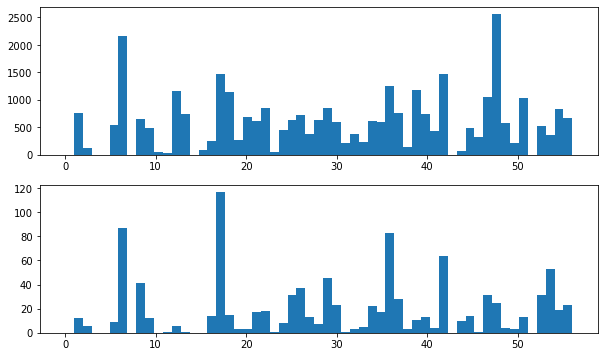

In [10]:
# look at correlation between features using histogram - SIGNIFICANT - STATE_CODE_001

fig, ax = plt.subplots(2, 1, figsize=(10, 6)) 

count0, bins_0, _ = ax[0].hist(X_train.loc[(y_train==0),'STATE_CODE_001'],bins=57, range=(0,56))
count1, bins_1, _ = ax[1].hist(X_train.loc[(y_train==1),'STATE_CODE_001'],bins=57, range=(0,56))

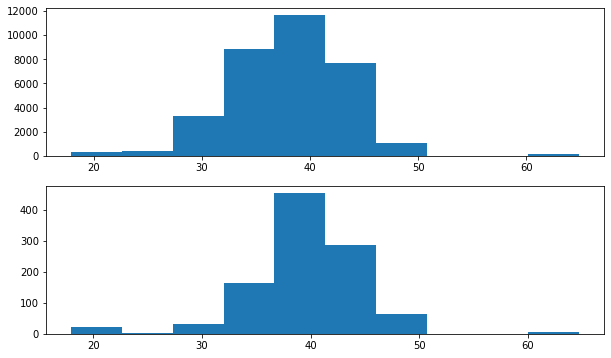

In [11]:
# look at correlation between features using histogram - Possibiy Significant - Latitude

fig, ax = plt.subplots(2, 1, figsize=(10, 6)) 

count0, bins_0, _ = ax[0].hist(X_train.loc[(y_train==0),'Latitude'])
count1, bins_1, _ = ax[1].hist(X_train.loc[(y_train==1),'Latitude'])

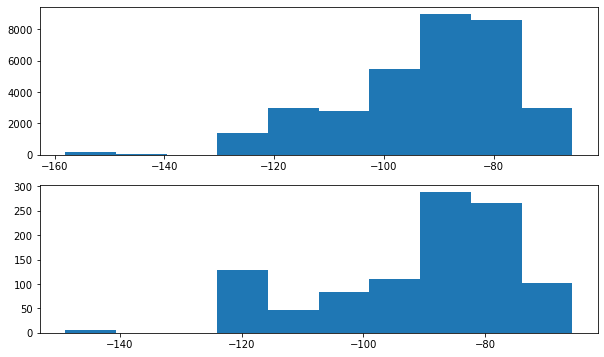

In [12]:
# look at correlation between features using histogram - Possibiy Significant - Longitude

fig, ax = plt.subplots(2, 1, figsize=(10, 6)) 

count0, bins_0, _ = ax[0].hist(X_train.loc[(y_train==0),'Longitude'])
count1, bins_1, _ = ax[1].hist(X_train.loc[(y_train==1),'Longitude'])

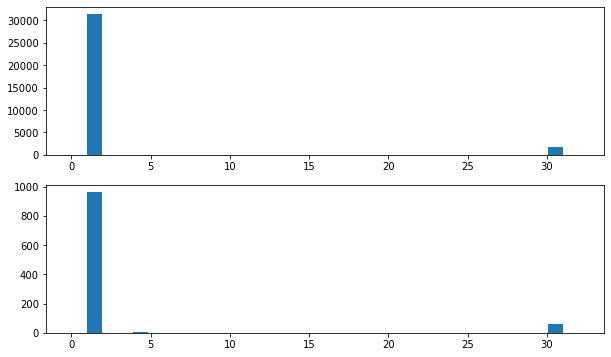

In [13]:
# look at correlation between features using histogram - Potentially significant - MAINTENANCE_021

fig, ax = plt.subplots(2, 1, figsize=(10, 6)) 

count0, bins_0, _ = ax[0].hist(X_train.loc[(y_train==0),'MAINTENANCE_021'], bins=33, range=(0,32))
count1, bins_1, _ = ax[1].hist(X_train.loc[(y_train==1),'MAINTENANCE_021'], bins=33, range=(0,32))

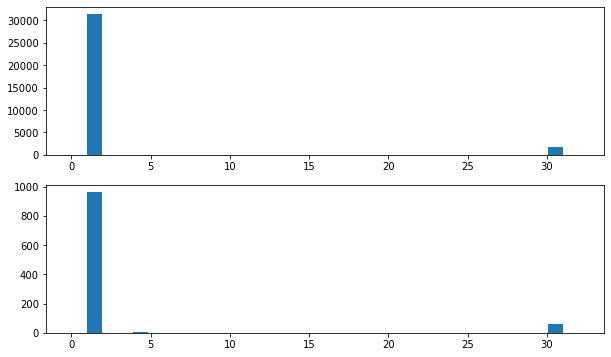

In [14]:
# look at correlation between features using histogram

fig, ax = plt.subplots(2, 1, figsize=(10, 6)) 

count0, bins_0, _ = ax[0].hist(X_train.loc[(y_train==0),'OWNER_022'], bins=33, range=(0,32))
count1, bins_1, _ = ax[1].hist(X_train.loc[(y_train==1),'OWNER_022'], bins=33, range=(0,32))

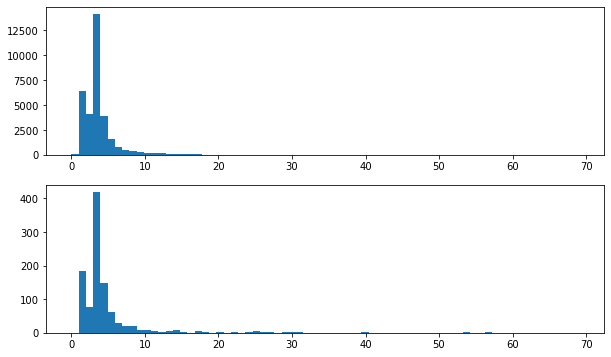

In [15]:
# look at correlation between features using histogram - Possibly Significant - MAIN_UNIT_SPANS_045

fig, ax = plt.subplots(2, 1, figsize=(10, 6)) 

count0, bins_0, _ = ax[0].hist(X_train.loc[(y_train==0),'MAIN_UNIT_SPANS_045'], bins=70, range=(0,69))
count1, bins_1, _ = ax[1].hist(X_train.loc[(y_train==1),'MAIN_UNIT_SPANS_045'], bins=70, range=(0,69))

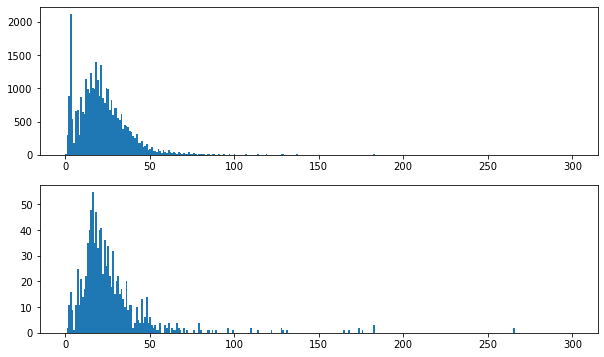

In [16]:
# look at correlation between features using histogram - Possibly Significant - 'MAX_SPAN_LEN_MT_048'

fig, ax = plt.subplots(2, 1, figsize=(10, 6)) 

count0, bins_0, _ = ax[0].hist(X_train.loc[(y_train==0),'MAX_SPAN_LEN_MT_048'], bins=301, range=(0,300))
count1, bins_1, _ = ax[1].hist(X_train.loc[(y_train==1),'MAX_SPAN_LEN_MT_048'], bins=301, range=(0,300))

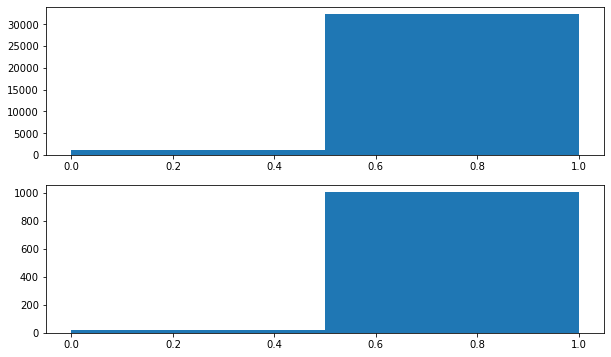

In [17]:
# look at correlation between features using histogram - Possibly Significant - NATIONAL_NETWORK_110

fig, ax = plt.subplots(2, 1, figsize=(10, 6)) 

count0, bins_0, _ = ax[0].hist(X_train.loc[(y_train==0),'NATIONAL_NETWORK_110'],bins=2, range=(0,1))
count1, bins_1, _ = ax[1].hist(X_train.loc[(y_train==1),'NATIONAL_NETWORK_110'],bins=2, range=(0,1))

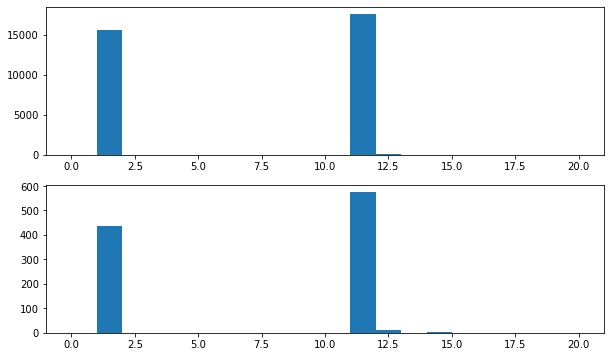

In [18]:
# look at correlation between features using histogram - Possiblity Significant - 'FUNCTIONAL_CLASS_026'

fig, ax = plt.subplots(2, 1, figsize=(10, 6)) 

count0, bins_0, _ = ax[0].hist(X_train.loc[(y_train==0),'FUNCTIONAL_CLASS_026'],bins=20, range=(0,20))
count1, bins_1, _ = ax[1].hist(X_train.loc[(y_train==1),'FUNCTIONAL_CLASS_026'],bins=20, range=(0,20))

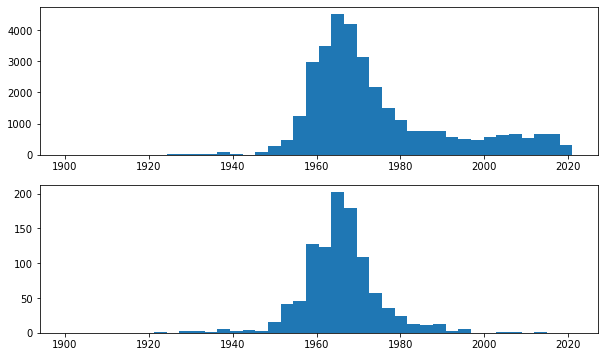

In [19]:
# look at correlation between features using histogram - SIGNIFICANT - YEAR_BUILT_027

fig, ax = plt.subplots(2, 1, figsize=(10, 6)) 

count0, bins_0, _ = ax[0].hist(X_train.loc[(y_train==0),'YEAR_BUILT_027'],bins=40, range=(1900,2021))
count1, bins_1, _ = ax[1].hist(X_train.loc[(y_train==1),'YEAR_BUILT_027'],bins=40, range=(1900,2021))

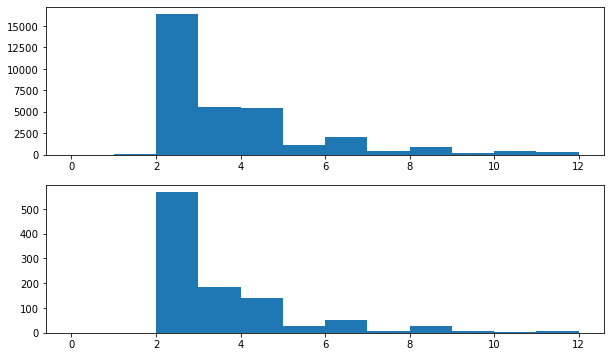

In [20]:
# look at correlation between features using histogram - Not significant and sum of lanes under as well

fig, ax = plt.subplots(2, 1, figsize=(10, 6)) 

count0, bins_0, _ = ax[0].hist(X_train.loc[(y_train==0),'TRAFFIC_LANES_ON_028A'],bins=12, range=(0,12))
count1, bins_1, _ = ax[1].hist(X_train.loc[(y_train==1),'TRAFFIC_LANES_ON_028A'],bins=12, range=(0,12))

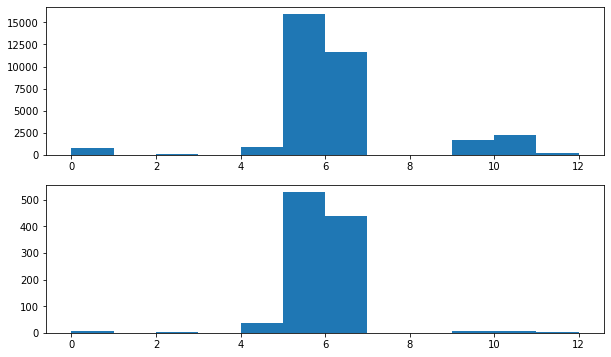

In [21]:
# look at correlation between features using histogram - Possibly Significant - DESIGN_LOAD_031

fig, ax = plt.subplots(2, 1, figsize=(10, 6)) 

count0, bins_0, _ = ax[0].hist(X_train.loc[(y_train==0),'DESIGN_LOAD_031'],bins=12, range=(0,12))
count1, bins_1, _ = ax[1].hist(X_train.loc[(y_train==1),'DESIGN_LOAD_031'],bins=12, range=(0,12))

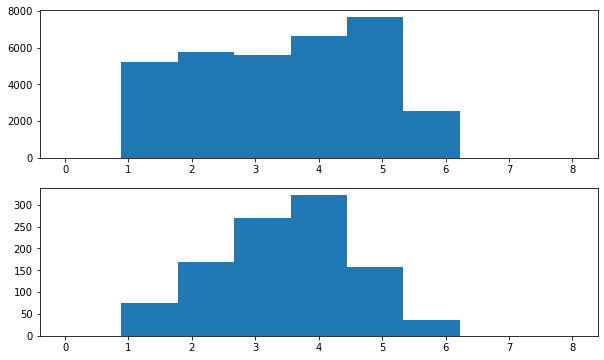

In [22]:
# look at correlation between features using histogram - SIGNIFICANT - STRUCTURE_KIND_043A

fig, ax = plt.subplots(2, 1, figsize=(10, 6)) 

count0, bins_0, _ = ax[0].hist(X_train.loc[(y_train==0),'STRUCTURE_KIND_043A'],bins=9, range=(0,8))
count1, bins_1, _ = ax[1].hist(X_train.loc[(y_train==1),'STRUCTURE_KIND_043A'],bins=9, range=(0,8))

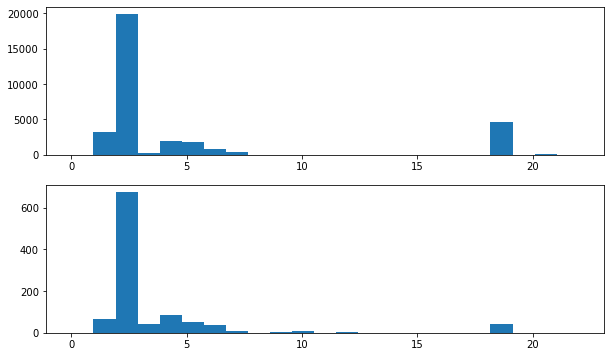

In [23]:
# look at correlation between features using histogram - Possibly Significant - STRUCTURE_TYPE_043B

fig, ax = plt.subplots(2, 1, figsize=(10, 6)) 

count0, bins_0, _ = ax[0].hist(X_train.loc[(y_train==0),'STRUCTURE_TYPE_043B'],bins=23, range=(0,22))
count1, bins_1, _ = ax[1].hist(X_train.loc[(y_train==1),'STRUCTURE_TYPE_043B'],bins=23, range=(0,22))

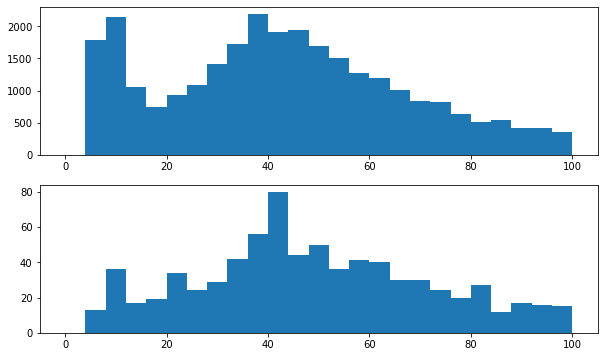

In [24]:
# look at correlation between features using histogram - Possibly Significant - STRUCTURE_LEN_MT_049

fig, ax = plt.subplots(2, 1, figsize=(10, 6)) 

count0, bins_0, _ = ax[0].hist(X_train.loc[(y_train==0),'STRUCTURE_LEN_MT_049'],bins=25, range=(0,100))
count1, bins_1, _ = ax[1].hist(X_train.loc[(y_train==1),'STRUCTURE_LEN_MT_049'],bins=25, range=(0,100))

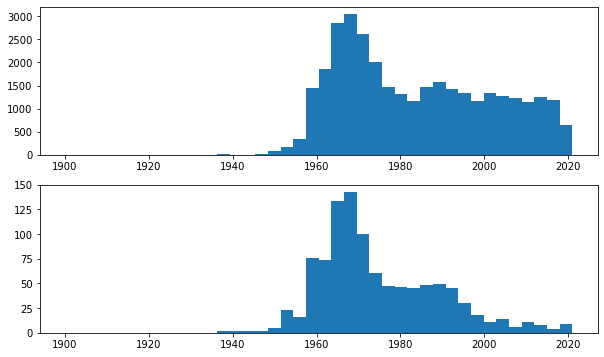

In [25]:
# look at correlation between features using histogram - SIGNIFICANT - YEAR_RECONSTRUCTED_106

fig, ax = plt.subplots(2, 1, figsize=(10, 6)) 

count0, bins_0, _ = ax[0].hist(X_train.loc[(y_train==0),'YEAR_RECONSTRUCTED_106'],bins=40, range=(1900,2021))
count1, bins_1, _ = ax[1].hist(X_train.loc[(y_train==1),'YEAR_RECONSTRUCTED_106'],bins=40, range=(1900,2021))

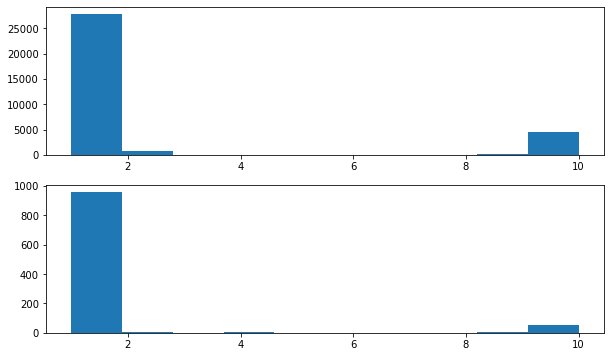

In [26]:
# look at correlation between features using histogram - possibly significant - DECK_STRUCTURE_TYPE_107

fig, ax = plt.subplots(2, 1, figsize=(10, 6)) 

count0, bins_0, _ = ax[0].hist(X_train.loc[(y_train==0),'DECK_STRUCTURE_TYPE_107'])
count1, bins_1, _ = ax[1].hist(X_train.loc[(y_train==1),'DECK_STRUCTURE_TYPE_107'])

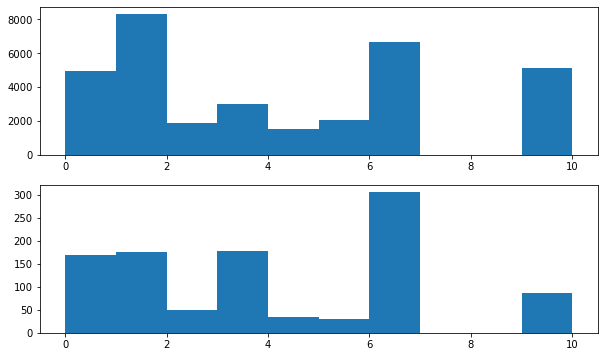

In [27]:
# look at correlation between features using histogram - possibly significant - SURFACE_TYPE_108A

fig, ax = plt.subplots(2, 1, figsize=(10, 6)) 

count0, bins_0, _ = ax[0].hist(X_train.loc[(y_train==0),'SURFACE_TYPE_108A'])
count1, bins_1, _ = ax[1].hist(X_train.loc[(y_train==1),'SURFACE_TYPE_108A'])

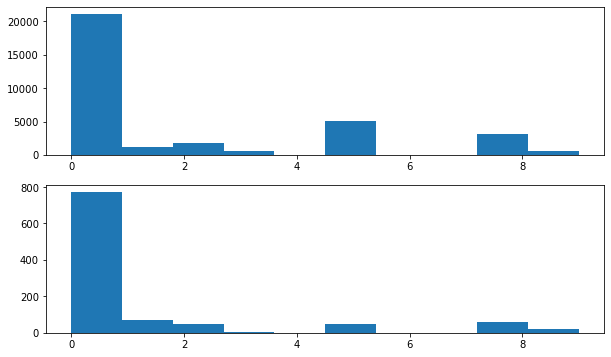

In [28]:
# look at correlation between features using histogram

fig, ax = plt.subplots(2, 1, figsize=(10, 6)) 

count0, bins_0, _ = ax[0].hist(X_train.loc[(y_train==0),'MEMBRANE_TYPE_108B'])
count1, bins_1, _ = ax[1].hist(X_train.loc[(y_train==1),'MEMBRANE_TYPE_108B'])

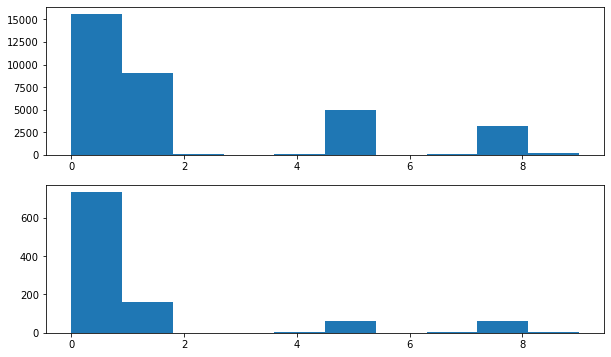

In [29]:
# look at correlation between features using histogram

fig, ax = plt.subplots(2, 1, figsize=(10, 6)) 

count0, bins_0, _ = ax[0].hist(X_train.loc[(y_train==0),'DECK_PROTECTION_108C'])
count1, bins_1, _ = ax[1].hist(X_train.loc[(y_train==1),'DECK_PROTECTION_108C'])

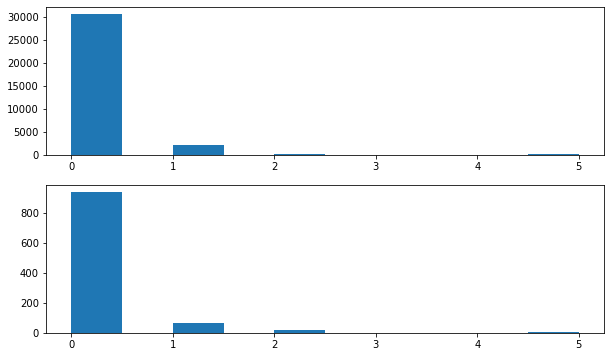

In [30]:
# look at correlation between features using histogram

fig, ax = plt.subplots(2, 1, figsize=(10, 6)) 

count0, bins_0, _ = ax[0].hist(X_train.loc[(y_train==0),'PIER_PROTECTION_111'])
count1, bins_1, _ = ax[1].hist(X_train.loc[(y_train==1),'PIER_PROTECTION_111'])

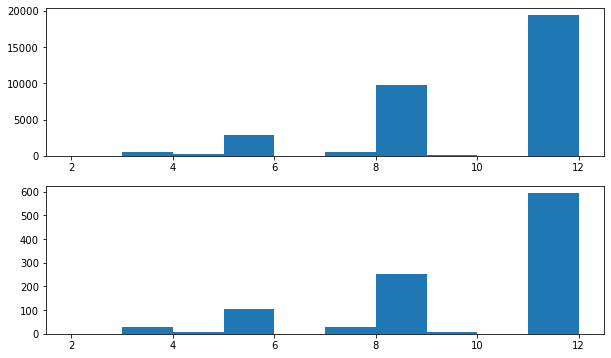

In [31]:
# look at correlation between features using histogram

fig, ax = plt.subplots(2, 1, figsize=(10, 6)) 

count0, bins_0, _ = ax[0].hist(X_train.loc[(y_train==0),'SCOUR_CRITICAL_113'])
count1, bins_1, _ = ax[1].hist(X_train.loc[(y_train==1),'SCOUR_CRITICAL_113'])

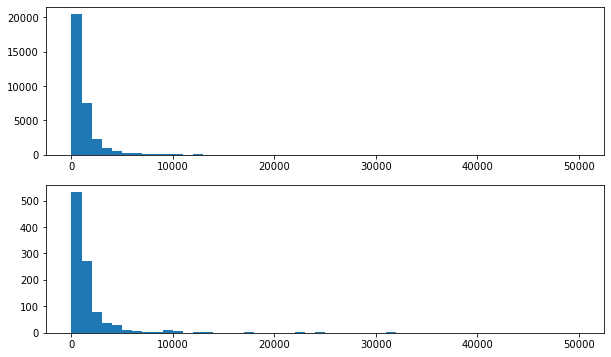

In [32]:
# look at correlation between features using histogram

fig, ax = plt.subplots(2, 1, figsize=(10, 6)) 

count0, bins_0, _ = ax[0].hist(X_train.loc[(y_train==0),'DECK_AREA'],bins=50, range=(0,50000))
count1, bins_1, _ = ax[1].hist(X_train.loc[(y_train==1),'DECK_AREA'],bins=50, range=(0,50000))

Dataset is very imbalanced so need to leverage imbalanced class techniques: 


In [33]:
# Before Regression - oversampling by a factor of 20 

import imblearn.over_sampling

# setup for the ratio argument of RandomOverSampler initialization
n_pos = np.sum(y_train == 1)
n_neg = np.sum(y_train == 0)
ratio = {1 : n_pos * 20, 0 : n_neg} 

# randomly oversample positive samples: create 4x as many 
ROS = imblearn.over_sampling.RandomOverSampler(sampling_strategy = ratio, random_state=42) 
    
X_train_rs, y_train_rs = ROS.fit_resample(X_train, y_train)

lr = LogisticRegression(solver='liblinear') 
lr.fit(X_train, y_train)
print('Simple Logistic Regression:')
print('Training: %.3f' % (lr.score(X_train, y_train)))
print('Test: %.3f' % (lr.score(X_test, y_test)))
print('Test F1: %.3f, Test AUC: %.3f' % \
      (f1_score(y_test, lr.predict(X_test)), roc_auc_score(y_test, lr.predict_proba(X_test)[:,1]))) 

print(' ')

lr_os = LogisticRegression(solver='liblinear') 
lr_os.fit(X_train_rs, y_train_rs)
print('Logistic Regression on Oversampled Train Data')
print('Training: %.3f' % (lr_os.score(X_train, y_train)))
print('Test: %.3f' % (lr_os.score(X_test, y_test)))
print('Test F1: %.3f, Test AUC: %.3f' % \
      (f1_score(y_test, lr_os.predict(X_test)), roc_auc_score(y_test, lr_os.predict_proba(X_test)[:,1])))

Simple Logistic Regression:
Training: 0.970
Test: 0.971
Test F1: 0.000, Test AUC: 0.682
 
Logistic Regression on Oversampled Train Data
Training: 0.841
Test: 0.838
Test F1: 0.106, Test AUC: 0.683


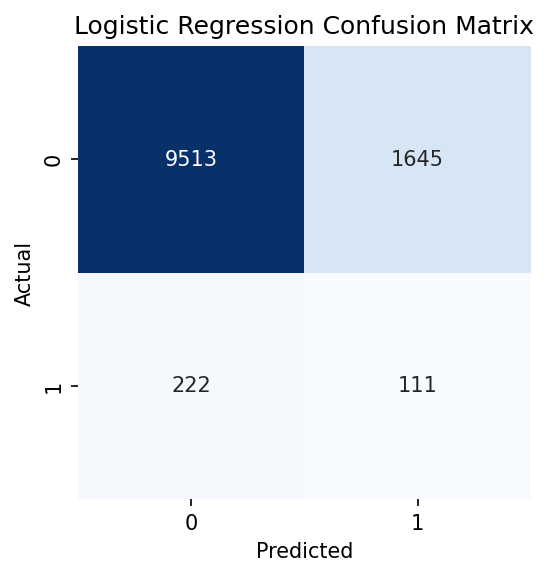

In [34]:
# print confusion matrix for Logistic Regression
lr_confusion = confusion_matrix(y_test, lr_os.predict(X_test))
plt.figure(dpi=150)
sns.heatmap(lr_confusion, cmap=plt.cm.Blues, annot=True, square=True, cbar=False, fmt='d')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix');

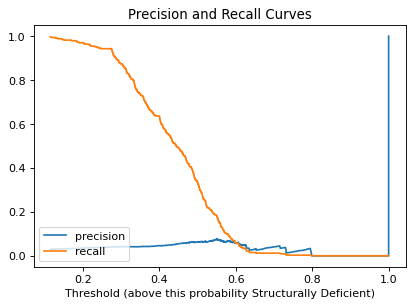

In [35]:
# recall precision trade-off

precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, lr_os.predict_proba(X_test)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability Structurally Deficient)');
plt.title('Precision and Recall Curves');

In [36]:
# with knn - oversampling at a factor of 20
knn = neighbors.KNeighborsClassifier()
knn.fit(X_train, y_train)

print('kNN:') 
print('Training: %.3f' % (knn.score(X_train, y_train)))
print('Test: %.3f' % (knn.score(X_test, y_test)))
print('Test F1: %.3f, Test AUC: %.3f' % \
      (f1_score(y_test, knn.predict(X_test)), roc_auc_score(y_test, knn.predict_proba(X_test)[:,1]))) 

print(' ')

knn_os = neighbors.KNeighborsClassifier()
knn_os.fit(X_train_rs, y_train_rs)
print('kNN on Oversampled Train Data:')
print('Train: %.3f' % (knn_os.score(X_train,y_train)))
print('Test: %.3f' % (knn_os.score(X_test,y_test)))
print('Test F1: %.3f, Test AUC: %.3f' % \
      (f1_score(y_test, knn_os.predict(X_test)), roc_auc_score(y_test, knn_os.predict_proba(X_test)[:,1])))

kNN:
Training: 0.971
Test: 0.971
Test F1: 0.071, Test AUC: 0.636
 
kNN on Oversampled Train Data:
Train: 0.952
Test: 0.916
Test F1: 0.178, Test AUC: 0.643


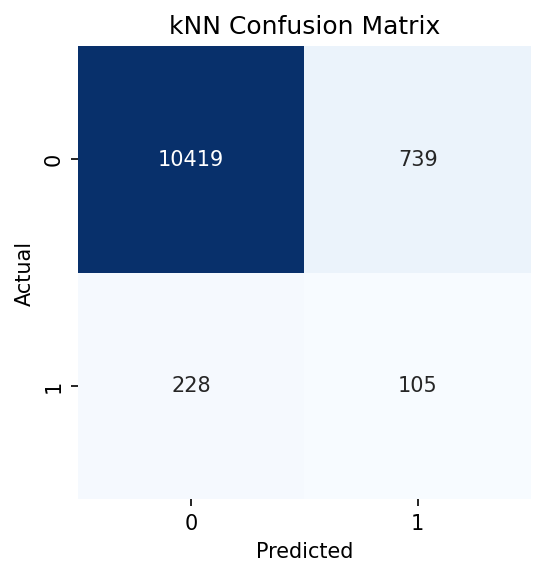

In [37]:
# print confusion matrix for KNN
knn_confusion = confusion_matrix(y_test, knn_os.predict(X_test))
plt.figure(dpi=150)
sns.heatmap(knn_confusion, cmap=plt.cm.Blues, annot=True, square=True, cbar=False, fmt='d')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('kNN Confusion Matrix');

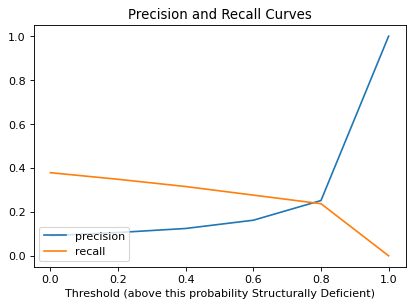

In [38]:
# recall precision trade-off

precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, knn_os.predict_proba(X_test)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability Structurally Deficient)');
plt.title('Precision and Recall Curves');

In [39]:
# with random forests - oversampling at a factor of 20 and ensembling
rf = ensemble.RandomForestClassifier(n_estimators=100, random_state=1)
rf.fit(X_train, y_train)
print('Random Forest:')
print('Train: %.3f' % (rf.score(X_train,y_train)))
print('Test: %.3f'% (rf.score(X_test,y_test)))
print('Test F1: %.3f, Test AUC: %.3f' % \
      (f1_score(y_test, rf.predict(X_test)), roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]))) 

print(' ')

rf_os = ensemble.RandomForestClassifier(n_estimators=100, random_state=1)
rf_os.fit(X_train_rs, y_train_rs)
print('Random Forest on Oversampled Train Data:')
print('Train: %.3f' % (rf_os.score(X_train,y_train)))
print('Test: %.3f'% (rf_os.score(X_test,y_test)))
print('Test F1: %.3f, Test AUC: %.3f' % \
      (f1_score(y_test, rf_os.predict(X_test)), roc_auc_score(y_test, rf_os.predict_proba(X_test)[:,1])))

Random Forest:
Train: 1.000
Test: 0.973
Test F1: 0.349, Test AUC: 0.875
 
Random Forest on Oversampled Train Data:
Train: 1.000
Test: 0.973
Test F1: 0.414, Test AUC: 0.873


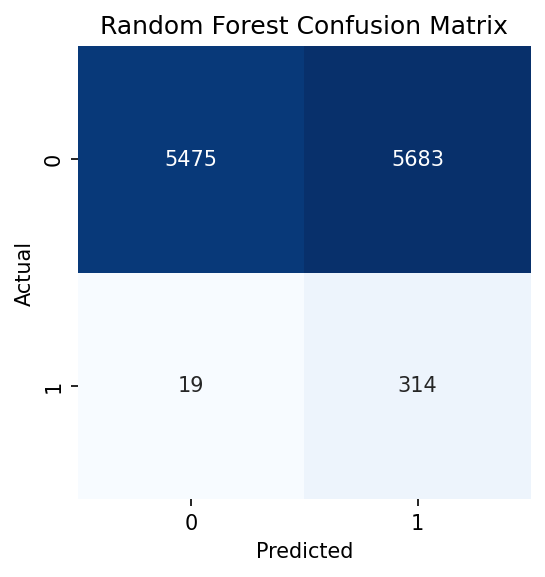

In [40]:
# print confusion matrix for Random Forest
rf_confusion = confusion_matrix(y_test, rf.predict_proba(X_test)[:,1]>0.009)

plt.figure(dpi=150)
sns.heatmap(rf_confusion, cmap=plt.cm.Blues, annot=True, square=True, cbar=False, fmt='d')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix');

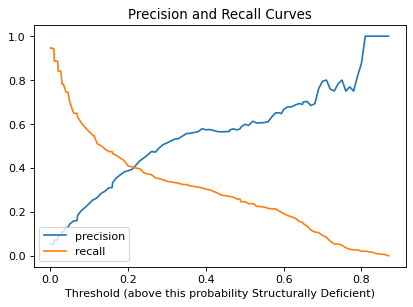

In [41]:
# recall precision trade-off

precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, rf.predict_proba(X_test)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability Structurally Deficient)');
plt.title('Precision and Recall Curves');

After running several models including LR, kNN, Ensemble Random Forest, and Ensemble Extra Trees, both with and without oversampling to compensate for the dataset imbalance, Ensemble Random Forest without oversampling is the best.  Performing feature engineering on the Ensemble Random Forest (code at the bottom) provided the best feature set.  Most of the feature engineering was selecting the right features and having those features correctly categorized, which was done in the database.

In [42]:
# assess feature importance
feat_imp = X_train.iloc[:0]
feat_imp = feat_imp.T
feat_imp.reset_index(inplace=True)
feat_imp['Importance'] = rf.feature_importances_.tolist()
# feat_imp['Importance OS'] = rf_os.feature_importances_.tolist()

In [43]:
feat_imp.sort_values('Importance', ascending = False, inplace = True)

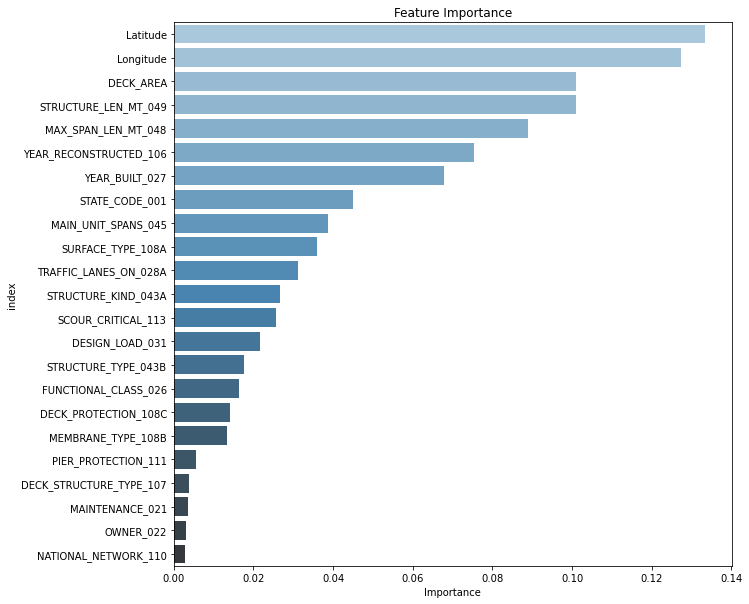

In [44]:
plt.figure(figsize=[10,10])
plt.title('Feature Importance')
# plt.xticks(rotation='vertical')

sns.barplot(x='Importance',y='index',data=feat_imp, palette='Blues_d'); 

In [45]:
# determine probability of structural deficiency of all observations
data['SDP'] = rf.predict_proba(data_X)[:,1]

In [46]:
data.to_csv('nbi_sdp.csv')

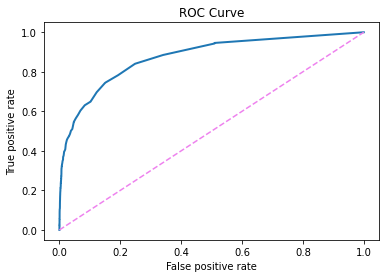

In [47]:
# plot ROC

fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])

plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve');


In [48]:
# with extra trees - oversampling at a factor of 20 and ensembling
et = ensemble.ExtraTreesClassifier(n_estimators=100, random_state=1)
et.fit(X_train, y_train)

print('Extra Trees:')
print('Train: %.3f' % (et.score(X_train,y_train)))
print('Test: %.3f'% (et.score(X_test,y_test)))
print('Test F1: %.3f, Test AUC: %.3f' % \
      (f1_score(y_test, et.predict(X_test)), roc_auc_score(y_test, et.predict_proba(X_test)[:,1]))) 

print(' ')

et_os = ensemble.ExtraTreesClassifier(n_estimators=100, random_state=1)
et_os.fit(X_train_rs, y_train_rs)
print('Extra Trees on Oversampled Train Data:')
print('Train: %.3f' % (et_os.score(X_train,y_train)))
print('Test: %.3f'% (et_os.score(X_test,y_test)))
print('ET on Oversampled Train Data; Test F1: %.3f, Test AUC: %.3f' % \
      (f1_score(y_test, et_os.predict(X_test)), roc_auc_score(y_test, et_os.predict_proba(X_test)[:,1])))

Extra Trees:
Train: 1.000
Test: 0.974
Test F1: 0.415, Test AUC: 0.859
 
Extra Trees on Oversampled Train Data:
Train: 1.000
Test: 0.974
ET on Oversampled Train Data; Test F1: 0.423, Test AUC: 0.846


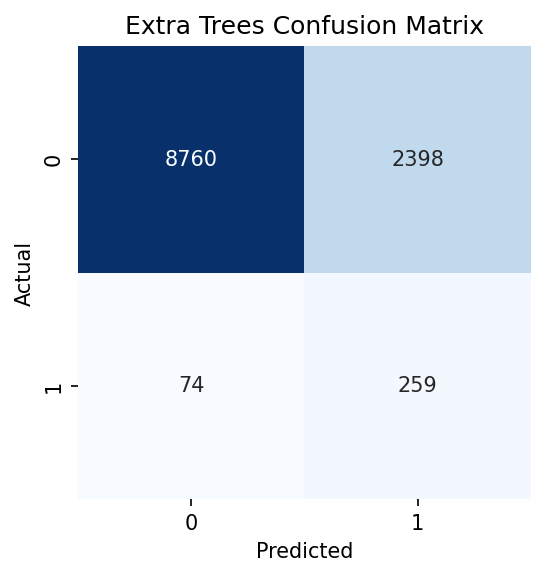

In [49]:
# print confusion matrix for Extra Trees
et_confusion = confusion_matrix(y_test, et_os.predict_proba(X_test)[:,1]>0.01)
plt.figure(dpi=150)
sns.heatmap(et_confusion, cmap=plt.cm.Blues, annot=True, square=True, cbar=False, fmt='d')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Extra Trees Confusion Matrix');

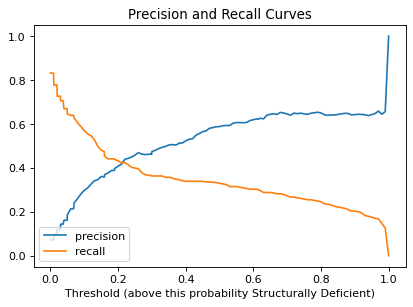

In [50]:
# recall precision trade-off

precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, et_os.predict_proba(X_test)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability Structurally Deficient)');
plt.title('Precision and Recall Curves');

In [51]:
# generate a subset of features for feature engineering
X_train_fe = X_train[['Latitude', 'Longitude', 'DECK_AREA', 'STRUCTURE_LEN_MT_049', \
                      'MAX_SPAN_LEN_MT_048', 'YEAR_RECONSTRUCTED_106', \
                      'YEAR_BUILT_027', 'STATE_CODE_001', 'MAIN_UNIT_SPANS_045', \
                      'SURFACE_TYPE_108A', 'TRAFFIC_LANES_ON_028A', \
                      'STRUCTURE_KIND_043A', 'SCOUR_CRITICAL_113', 'DESIGN_LOAD_031']]
X_test_fe = X_test[['Latitude', 'Longitude', 'DECK_AREA', 'STRUCTURE_LEN_MT_049', \
                      'MAX_SPAN_LEN_MT_048', 'YEAR_RECONSTRUCTED_106', \
                      'YEAR_BUILT_027', 'STATE_CODE_001', 'MAIN_UNIT_SPANS_045', \
                      'SURFACE_TYPE_108A', 'TRAFFIC_LANES_ON_028A', \
                      'STRUCTURE_KIND_043A', 'SCOUR_CRITICAL_113', 'DESIGN_LOAD_031']]
X_train_fe_rs, y_train_fe_rs = ROS.fit_resample(X_train_fe, y_train)

In [52]:
# with random forests - oversampling at a factor of 20 and ensembling
rf_fe = ensemble.RandomForestClassifier(n_estimators=100, random_state=1)
rf_fe.fit(X_train_fe, y_train)
print('Random Forest:')
print('Train: %.3f' % (rf_fe.score(X_train_fe,y_train)))
print('Test: %.3f'% (rf_fe.score(X_test_fe,y_test)))
print('Test F1: %.3f, Test AUC: %.3f' % \
      (f1_score(y_test, rf_fe.predict(X_test_fe)), roc_auc_score(y_test, rf_fe.predict_proba(X_test_fe)[:,1]))) 

print(' ')

rf_fe_os = ensemble.RandomForestClassifier(n_estimators=100, random_state=1)
rf_fe_os.fit(X_train_fe_rs, y_train_fe_rs)
print('Random Forest on Oversampled Train Data:')
print('Train: %.3f' % (rf_fe_os.score(X_train_fe_rs,y_train_fe_rs)))
print('Test: %.3f'% (rf_fe_os.score(X_test_fe,y_test)))
print('Test F1: %.3f, Test AUC: %.3f' % \
      (f1_score(y_test, rf_fe_os.predict(X_test_fe)), roc_auc_score(y_test, rf_fe_os.predict_proba(X_test_fe)[:,1])))

Random Forest:
Train: 1.000
Test: 0.973
Test F1: 0.337, Test AUC: 0.869
 
Random Forest on Oversampled Train Data:
Train: 1.000
Test: 0.972
Test F1: 0.402, Test AUC: 0.866
